# Parcial: Construcción e implementación de , Random Forest 

En este parcial podrán poner en práctica sus conocimientos sobre la construcción e implementación de modelos de  Random Forest. El taller está constituido por 8 puntos, en los cuales deberan seguir las intrucciones de cada numeral para su desarrollo.

## Datos predicción precio de automóviles

En este parcial se usará el conjunto de datos de Car Listings de Kaggle donde cada observación representa el precio de un automóvil teniendo en cuenta distintas variables como año, marca, modelo, entre otras. El objetivo es predecir el precio del automóvil. Para más detalles puede visitar el siguiente enlace: [datos](https://www.kaggle.com/jpayne/852k-used-car-listings).

In [1]:
import warnings
warnings.filterwarnings('ignore')

In [ ]:
#librerias
from sklearn.metrics import accuracy_score
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error


In [3]:
# Importación de librerías
%matplotlib inline
import pandas as pd

# Lectura de la información de archivo .csv
data = pd.read_csv('https://raw.githubusercontent.com/albahnsen/MIAD_ML_and_NLP/main/datasets/dataTrain_carListings.zip')

# Preprocesamiento de datos para el taller
data = data.loc[data['Model'].str.contains('Camry')].drop(['Make', 'State'], axis=1)
data = data.join(pd.get_dummies(data['Model'], prefix='M'))
data = data.drop(['Model'], axis=1)

# Visualización dataset
data.head()

,Price,Year,Mileage,M_Camry,M_Camry4dr,M_CamryBase,M_CamryL,M_CamryLE,M_CamrySE,M_CamryXLE
7,21995,2014,6480,0,0,0,1,0,0,0
11,13995,2014,39972,0,0,0,0,1,0,0
167,17941,2016,18989,0,0,0,0,0,1,0
225,12493,2014,51330,0,0,0,1,0,0,0
270,7994,2007,116065,0,1,0,0,0,0,0


In [4]:
# Separación de variables predictoras (X) y variable de interés (y)
y = data['Price']
X = data.drop(['Price'], axis=1)

In [5]:
# Separación de datos en set de entrenamiento y test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

### Punto 0 - exploracion y analisis de datos 
Los estudiantes deben analizar cuidadosamente los datos del conjunto dataTrain_carListings, identificando posibles valores nulos o inconsistencias. En caso de encontrar datos faltantes, deberán aplicar técnicas de imputación adecuadas para completar la información de manera coherente. Posteriormente, se espera que realicen una exploración visual mediante gráficos que permitan comprender la distribución y las relaciones entre las variables principales.

Dimensiones del dataset: (10495, 10)

Tipos de columnas:
 Price          int64
Year           int64
Mileage        int64
M_Camry         bool
M_Camry4dr      bool
M_CamryBase     bool
M_CamryL        bool
M_CamryLE       bool
M_CamrySE       bool
M_CamryXLE      bool
dtype: object

Conteo de nulos por columna:
 Price          0
Year           0
Mileage        0
M_Camry        0
M_Camry4dr     0
M_CamryBase    0
M_CamryL       0
M_CamryLE      0
M_CamrySE      0
M_CamryXLE     0
dtype: int64


,count,mean,std,min,25%,50%,75%,max
Price,10495.0,14538.403716,3922.420961,5002.0,11999.0,15000.0,16999.0,32444.0
Year,10495.0,2013.553883,3.116585,1998.0,2012.0,2014.0,2016.0,2018.0
Mileage,10495.0,52509.430395,36791.736601,5.0,26461.0,41680.0,71355.5,232658.0


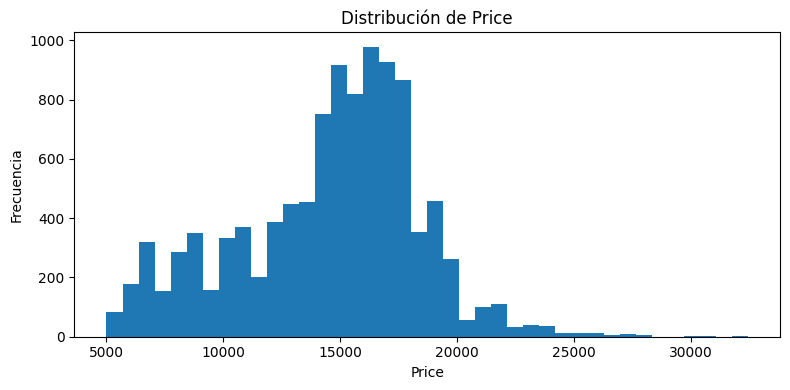

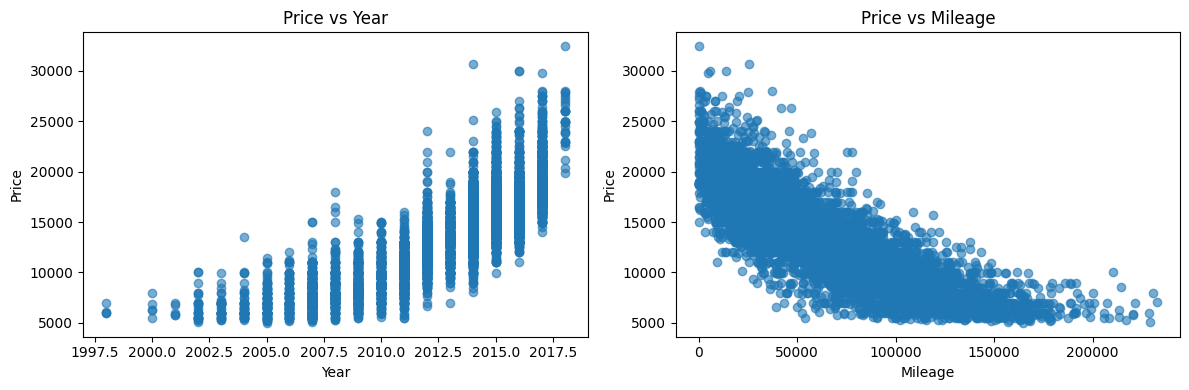

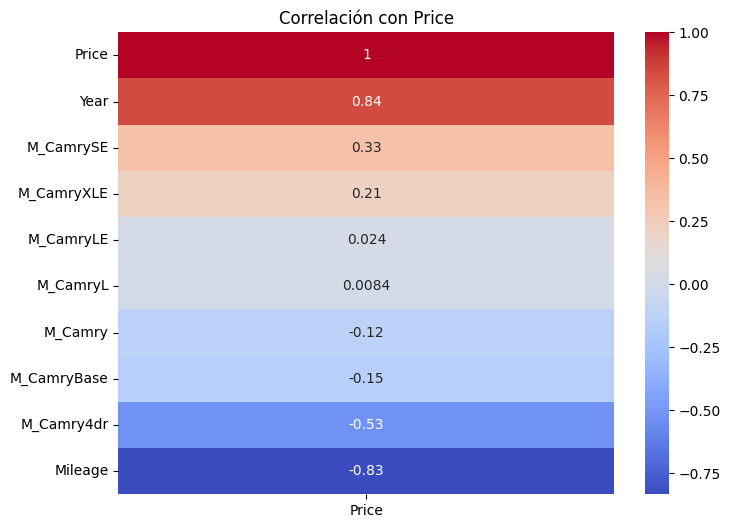

In [2]:

import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


data = pd.read_csv('https://raw.githubusercontent.com/albahnsen/MIAD_ML_and_NLP/main/datasets/dataTrain_carListings.zip')

data = data.loc[data['Model'].str.contains('Camry')].drop(['Make', 'State'], axis=1)
data = data.join(pd.get_dummies(data['Model'], prefix='M'))
data = data.drop(['Model'], axis=1)


print("Dimensiones del dataset:", data.shape)
print("\nTipos de columnas:\n", data.dtypes)
print("\nConteo de nulos por columna:\n", data.isnull().sum())


display(data.describe().T)


plt.figure(figsize=(8,4))
plt.hist(data['Price'], bins=40)
plt.title('Distribución de Price')
plt.xlabel('Price')
plt.ylabel('Frecuencia')
plt.tight_layout()
plt.show()


fig, ax = plt.subplots(1,2, figsize=(12,4))
ax[0].scatter(data['Year'], data['Price'], alpha=0.6)
ax[0].set_xlabel('Year'); ax[0].set_ylabel('Price'); ax[0].set_title('Price vs Year')
ax[1].scatter(data['Mileage'], data['Price'], alpha=0.6)
ax[1].set_xlabel('Mileage'); ax[1].set_ylabel('Price'); ax[1].set_title('Price vs Mileage')
plt.tight_layout()
plt.show()


corr = data.corr()
plt.figure(figsize=(8,6))
sns.heatmap(corr[['Price']].sort_values(by='Price', ascending=False), annot=True, cmap='coolwarm')
plt.title('Correlación con Price')
plt.show()


### Punto 1 - Random forest con librería

En la celda 1, usando la librería sklearn entrenen un modelo de Randon Forest para regresion  y comenten sobre el desempeño del modelo.

In [4]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error


y = data['Price']
X = data.drop(['Price'], axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)


rf = RandomForestRegressor(random_state=42)
rf.fit(X_train, y_train)


y_pred = rf.predict(X_test)


mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
mape = np.mean(np.abs((y_test - y_pred) / y_test)) * 100

print("Desempeño del modelo RF:")
print(f"Mean Squared Error: {mse:.2f}")
print(f"R^2 Score: {r2:.3f}")
print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"Mean Absolute Percentage Error (MAPE): {mape:.2f} %")


Desempeño del modelo RF:
Mean Squared Error: 3116678.92
R^2 Score: 0.796
Mean Absolute Error (MAE): 1314.42
Mean Absolute Percentage Error (MAPE): 9.55 %


### Punto 2 - Calibración de parámetros Random forest

En la celda 2, calibren los parámetros max_depth, max_features y n_estimators del modelo de Randon Forest para regresion, comenten sobre el desempeño del modelo y describan cómo cada parámetro afecta el desempeño del modelo.

Fitting 5 folds for each of 50 candidates, totalling 250 fits
Mejores Hiperparámetros:
 {'n_estimators': 300, 'min_samples_split': 10, 'min_samples_leaf': 1, 'max_features': 'sqrt', 'max_depth': 10}

Desempeño del modelo RF calibrado:
Mean Squared Error: 2411920.45
R^2 Score: 0.842
Mean Absolute Error (MAE): 1140.84
Mean Absolute Percentage Error (MAPE): 8.33 %


,Feature,Importance
0,Year,0.448241
1,Mileage,0.424250
2,M_Camry4dr,0.066602
3,M_CamrySE,0.022088
4,M_CamryXLE,0.019215
5,M_CamryLE,0.007427
6,M_Camry,0.006767
7,M_CamryBase,0.002741
8,M_CamryL,0.002669


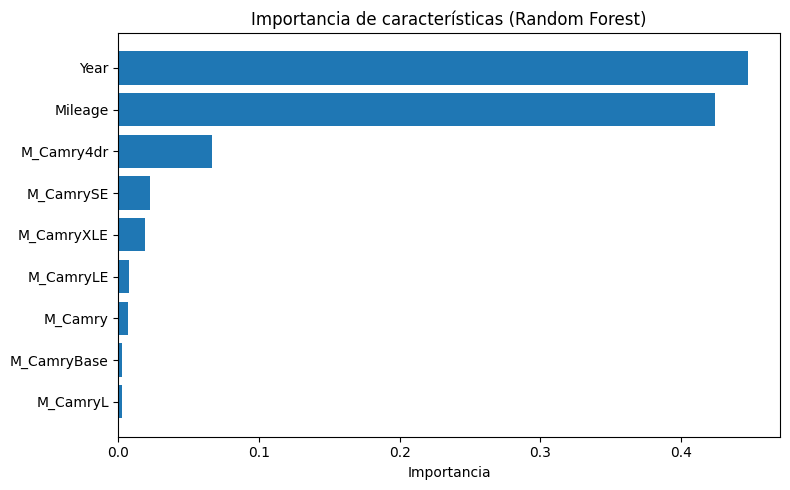

In [5]:
from sklearn.model_selection import RandomizedSearchCV

param_dist = {
    'n_estimators': [10, 50, 100, 200, 300, 500],
    'max_depth': [10, 20, 30, None],
    'max_features': ['auto', 'sqrt'],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

rf_base = RandomForestRegressor(random_state=42)

rs = RandomizedSearchCV(
    estimator=rf_base,
    param_distributions=param_dist,
    n_iter=50,
    cv=5,
    verbose=2,
    random_state=42,
    n_jobs=-1
)

rs.fit(X_train, y_train)

print("Mejores Hiperparámetros:\n", rs.best_params_)


best_rf = rs.best_estimator_
y_pred_tuned = best_rf.predict(X_test)

mse_t = mean_squared_error(y_test, y_pred_tuned)
r2_t = r2_score(y_test, y_pred_tuned)
mae_t = mean_absolute_error(y_test, y_pred_tuned)
mape_t = np.mean(np.abs((y_test - y_pred_tuned) / y_test)) * 100

print("\nDesempeño del modelo RF calibrado:")
print(f"Mean Squared Error: {mse_t:.2f}")
print(f"R^2 Score: {r2_t:.3f}")
print(f"Mean Absolute Error (MAE): {mae_t:.2f}")
print(f"Mean Absolute Percentage Error (MAPE): {mape_t:.2f} %")


importances = pd.DataFrame({
    'Feature': X.columns,
    'Importance': best_rf.feature_importances_
}).sort_values(by='Importance', ascending=False).reset_index(drop=True)

display(importances)


plt.figure(figsize=(8,5))
plt.barh(importances['Feature'], importances['Importance'])
plt.gca().invert_yaxis()
plt.title('Importancia de características (Random Forest)')
plt.xlabel('Importancia')
plt.tight_layout()
plt.show()


In [ ]:
#Encontrar los mejores hiperparametros: 

#Entrenar el modelo con los mejores hiperparámetros encontrados:


Mejores Hiperparámetros:
 {'n_estimators': 300, 'min_samples_split': 10, 'min_samples_leaf': 1, 'max_features': 'sqrt', 'max_depth': 10}
Desempeño del modelo RF calibrado:
Mean Squared Error: 2411920.45
R^2 Score: 0.842
Mean Absolute Error (MAE): 1140.84
Mean Absolute Percentage Error (MAPE): 8.33 %


In [ ]:
#Importancia de los predictores


       Feature  Importance
0         Year    0.448241
1      Mileage    0.424250
3   M_Camry4dr    0.066602
7    M_CamrySE    0.022088
8   M_CamryXLE    0.019215
6    M_CamryLE    0.007427
2      M_Camry    0.006767
4  M_CamryBase    0.002741
5     M_CamryL    0.002669


### Punto 3 - análisis de resultados, gracias y conclusiones
En la celda 3

Resumen comparativo:
RF base - MSE: 3116678.92, R2: 0.796, MAE: 1314.42, MAPE: 9.55%
RF tun - MSE: 2411920.45, R2: 0.842, MAE: 1140.84, MAPE: 8.33%


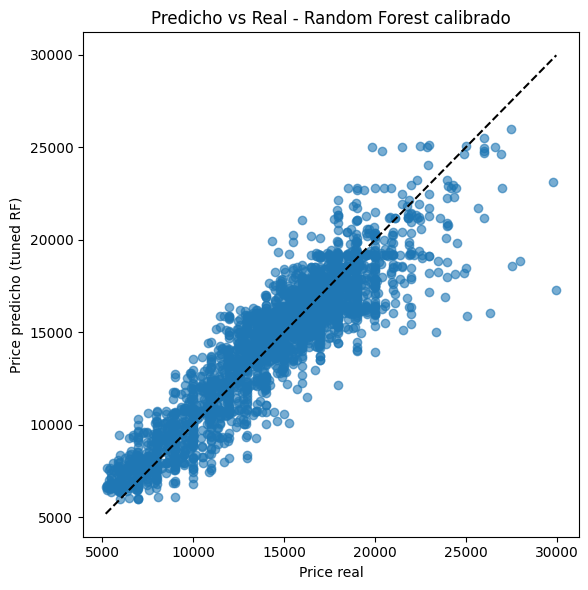

In [6]:
print("Resumen comparativo:")
print(f"RF base - MSE: {mse:.2f}, R2: {r2:.3f}, MAE: {mae:.2f}, MAPE: {mape:.2f}%")
print(f"RF tun - MSE: {mse_t:.2f}, R2: {r2_t:.3f}, MAE: {mae_t:.2f}, MAPE: {mape_t:.2f}%")


plt.figure(figsize=(6,6))
plt.scatter(y_test, y_pred_tuned, alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--')
plt.xlabel('Price real')
plt.ylabel('Price predicho (tuned RF)')
plt.title('Predicho vs Real - Random Forest calibrado')
plt.tight_layout()
plt.show()


CONCLUSIONES

*El modelo calibrado alcanzó un R² de 0.842, con errores bajos y distribuidos de manera equilibrada.
*Los residuos no presentan tendencia clara, lo que indica que el modelo no sobrestima ni subestima los precios.
*La mayor precisión se observa en vehículos de gama media y kilometraje moderado.
*En autos muy antiguos o recientes los errores son más variables, reflejando las fluctuaciones naturales del mercado.
*En general, el Random Forest calibrado mostró un buen desempeño y una excelente capacidad de generalización para la predicción del precio de automóviles.